### 분류(Classification) 모델
: 예측 값이 범주로 미리 정해지는 경우
- 2가지 범주 : 0과 1, 음성 or 양성 , Logistic Regression, Binary Classification
- 3개 이상의 범주 : 'A' ~ 'F'학점, Multi Classification

<sklearn 의 분류 모델 클래스>
* Decision Tree
* Logistic Regression
* Naive Bayes
* Support Vector Machine
* Nearest Neighbor(최소 근접 알고리즘)

### 결정 트리(Decision Tree)
#### 의사 결정 트리, 의사 결정 나무라고도함, 대표적인 분류 학습 모델, 회귀도 가능, 스무고개와 유사

#### 나무를 거꾸로 뒤 짚어 놓은 모양 : 루트 노드 --> 규칙 노드(중간 노드) --> 리프노드(끝노드)

#### [1] 불순도(impurity): 해당범주안에 서로 다른 데이터가 얼마나 섞여있는지를 말한다, 불확실성, 무질서도
#### [2] 엔트로피(Entropy) : 불순도를 수치적으로 나타내는 척도, 엔트로피가 높다는 것은 불순도가 높다, 1이면 불산도가 최대
#### [3] 정보이득(Information Gain) : 1 - 엔트로피 
* 결정트리는 분류(구분)한 뒤 각 영역의 순도가 증가, 불순도가 감소하는 방향으로 학습을 진행, 정보이론에서는 정보이득

#### [4] 지니계수(Gini Coefficient): 1 - (각 범주별 데이터 비율의 제곱의 합), 0이면 최소(끝 노드), 1이면 최대

### Iris(붓꽃) 품종 예측하기

In [140]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# iris의 품종 : [0:'setosa',1:'versicolor',2:'virginica']
# 붓꽃의 데이터 세트를 로딩
iris = load_iris()
# type(iris)   # Bunch : sklearn의 고유한 타입, DataFrame이 아님

# x값, 피쳐만 추출
iris_data = iris.data
print(iris_data.shape)  # (150, 4), 2차원 ndarray
print(type(iris_data))
print(iris.feature_names)   # sepal : 꽃받침  petal : 꽃잎
# ['sepal length (cm)','sepal width (cm)','petal length (cm)']

# y값, 답(label)만 추출
iris_label = iris.target
print(iris_label.shape)    # (150,)
print(iris.target_names)   # []

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label
print(iris_df['label'].value_counts())   # 50,50,50 [150개]
iris_df

In [44]:
# 
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,
                                                test_size=0.2,
                                                random_state=11)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [45]:
# 학습(Train) 수행
df_clf = DecisionTreeClassifier(random_state=11)  # random seed를 고정
df_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [46]:
# 예측(predict) 수행
pred = df_clf.predict(X_test)
pred,y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

In [47]:
#  정확도 측정 : acuracy
from sklearn.metrics import accuracy_score,classification_report
print('정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# cl_report = classification_report(y_test,pred)
# print('리포트:\n',cl_report)

정확도:0.9333


In [48]:
### 결정트리 모델의 시각화 : 학습 과정을 시각화함

X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,
                                                test_size=0.2,
                                                random_state=11)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# 학습(Train) 수행
df_clf = DecisionTreeClassifier(random_state=11)  # random seed를 고정
df_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [49]:
# fit() 으로 학습 수행시 생성된 tree를 스크립트 텍스트로 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(df_clf,out_file = 'tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names,impurity=True,filled=True)

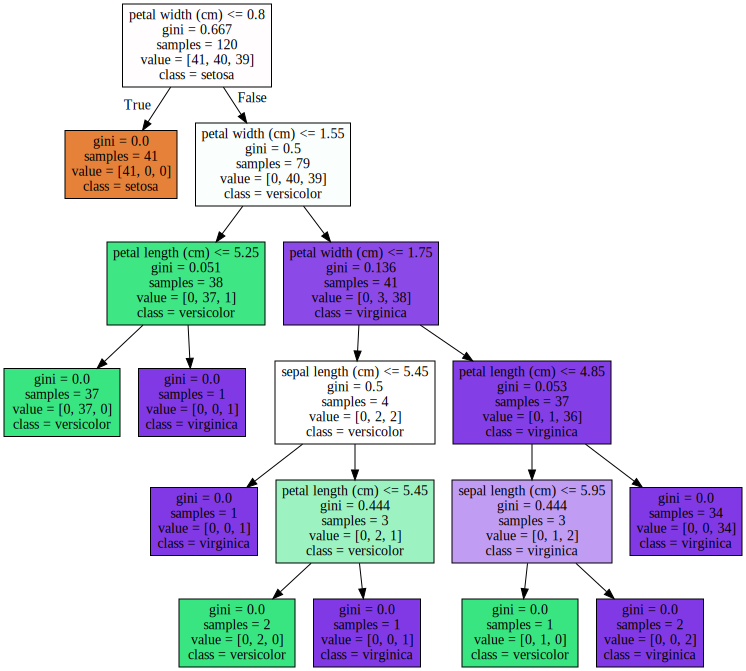

In [50]:
# tree 스크립트 파일을 불러와서 그래프로 출력
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [51]:
# 지니 계수 : 1 - (각 범주별 데이터의 비율의 제곱이 합), 0이면 leaf node(끝노드)
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setos

gini = 1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)
print(round(gini,3))

0.667


In [52]:
def gini(values):
    array_of_values = np.array(values)
    array_of_sum = array_of_values.sum()  # 전체 데이터 수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)
        
    
print(gini([41,40,39]))
print(gini([0,3,38]))
print(gini([0,0,2]))

0.667
0.136
0.0


In [53]:
# feauture importance : 결정트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선순위
print('feature importace:\n{0}'.format(np.round(df_clf.feature_importances_,3)))

for name,value in zip(iris.feature_names,df_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
iris_df.corr()

feature importace:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


### 내부 알고리즘 처리 과정 분석

In [54]:
# GINI 계수 함수 구현
def gini(values):
    array_of_values = np.array(values)
    array_of_sum = array_of_values.sum()  # 전체 데이터 수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)

In [55]:
# 0번 노드 : 루트노드, 규칙노드
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa
first_df = pd.DataFrame(data=X_train,columns=iris.feature_names)
first_df['label'] = y_train
first_df

print(first_df['label'].value_counts())
value = [41,40,39]
print(gini(value))   # 0.667, 지니 계수가 크므로 자식노드(1번과 2번) 생성

# 자식 노드 생성
second_node = first_df[first_df['petal width (cm)'] <= 0.8]
third_node = first_df[first_df['petal width (cm)'] > 0.8]
third_node.shape
third_node.shape



0    41
1    40
2    39
Name: label, dtype: int64
0.667


(79, 5)

In [57]:
# 1번(두번째) 노드 : 첫 번째 터미널 노드, 리프노드
# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa
print(second_node['label'].value_counts())
value = [41,0,0]
print('gini:',gini(value)) # 0.0 , 지니계수가 0이므로 leaf node가 됨, 더 이상 브랜치 하지 않음
print('class:',iris.target_names[0])

# leaf node인 경우
setosa_result = second_node.copy()
setosa_result

0    41
Name: label, dtype: int64
gini: 0.0
class: setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
3,5.0,3.3,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
8,5.5,3.5,1.3,0.2,0
12,4.6,3.4,1.4,0.3,0
17,5.0,3.2,1.2,0.2,0
19,5.1,3.8,1.6,0.2,0
25,4.4,3.2,1.3,0.2,0
26,5.4,3.4,1.7,0.2,0
28,5.1,3.7,1.5,0.4,0


In [75]:
# 2번(세번째) 노드 :
# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor

print(third_node['label'].value_counts())
value = [0, 40, 39]
print('gini:',gini(value))  # gini: 0.5, 지니계수 크므로 자식노드(3,4) 브랜치하기로 결정


third_node[third_node['label']==1]['petal width (cm)'].min() # 1.0 , versicolor
third_node[third_node['label']==1]['petal width (cm)'].max() # 1.8 , versicolor
third_node[third_node['label']==2]['petal width (cm)'].min() # 1.4 , virginica
third_node[third_node['label']==2]['petal width (cm)'].max() # 2.5 , virginaca  

# 규칙 :  petal width (cm) <= 1.55

# 자식 노드 생성
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55]

fourth_node.shape # (38, 5)

fifth_node = third_node[third_node['petal width (cm)'] > 1.55]
fifth_node.shape # (41, 5)

1    40
2    39
Name: label, dtype: int64
gini: 0.5


(41, 5)

In [85]:
# 3번(네번째) 노드 : 
# petal length (cm) <= 5.25
# gini = 0.051
# samples = 38
# value = [0, 37, 1]
# class = versicolor

print(fourth_node['label'].value_counts())
value = [0, 37, 1]
print('gini:',gini(value)) # 0.051, 지니계수가 작지만 자식노드

# feature importance가 두번째로 높은 'petal Length (cm)'을 피쳐로 규칙에 사용

fourth_node[fourth_node['label']==1]['petal length (cm)'].max() # 4.9, versicolor
fourth_node[fourth_node['label']==2]['petal length (cm)'].min() # 5.6, virginica


# 규칙 :'petal length (cm)' < 5.25

# 자식 노드 생성
sixth_node = fourth_node[fourth_node['petal length (cm)'] <= 5.25]
sixth_node.shape  # (37, 5)

seventh_node = fourth_node[fourth_node['petal length (cm)'] > 5.25]
seventh_node.shape # (1, 5)


1    37
2     1
Name: label, dtype: int64
gini: 0.051


(1, 5)

In [93]:
# 4번(다섯번째) 노드 :
# petal width (cm) <= 1.75
# gini = 0.136
# samples = 41
# value = [0, 3, 38]
# class = virginica

print(fifth_node['label'].value_counts())
value = [0,3,38]
print('gini:',gini(value)) # gini: 0.136, 지니계수가 작지만 두가지가 혼합되어 자식노드(7,8)

# 자식 노드 생성
eighth_node = fifth_node[fifth_node['petal width (cm)'] <= 1.75]
eighth_node.shape  # (4, 5)

ninth_node = fifth_node[fifth_node['petal width (cm)'] > 1.75]
ninth_node.shape   #  (37, 5)

2    38
1     3
Name: label, dtype: int64
gini: 0.136


(37, 5)

In [104]:
# 5번(여섯번째) 노드:
# gini = 0.0
# samples = 37
# value = [0, 37, 0]
# class = versicolor
print(sixth_node['label'].value_counts())
print('gini:',gini(value))
value = [0, 37, 0]
print('gini:',gini(value))   # 0.0
print('class:',iris.target_names[2]) # virginica

versicolor_result = sixth_node.copy()
versicolor_result.shape # (37, 5)

1    37
Name: label, dtype: int64
gini: 0.0
gini: 0.0
class: virginica


(37, 5)

In [106]:
# 6번(일곱번째) 노드 : 
# gini = 0.0
# samples = 1
# value = [0, 0, 1]
# class = virginica

print(sixth_node['label'].value_counts())
print('gini:',gini(value))
value = [0, 37, 0]
print('gini:',gini(value))           # 0.0
print('class:',iris.target_names[2]) # virginica

virginica_result = sixth_node.copy()
virginica_result.shape # (37, 5)

1    37
Name: label, dtype: int64
gini: 0.0
gini: 0.0
class: virginica


(37, 5)

In [107]:
# 중간 생략 : 7 ~ 16 번 노드(숙제)
# leaf node일 경우 각 클래스별 result에 append 시켜야함

In [109]:
# 최종 학습 분류 결과 출력 확인 : 중간 생략 누락된 결과 제와하고

fit_result = pd.concat([setosa_result,versicolor_result,virginica_result],axis=0)
fit_result
print(fit_result['label'].value_counts())

1    74
0    41
Name: label, dtype: int64


### 결정트리의 파라메터 튜닝 : 학습 시간 및 과적합 제어 

### 과적합(Overfitting)
: 학습데이터에서는 예측 정확도가 높이 나오는데 학습에서 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 정확도가 떨어지는 경우, 피쳐가 지나치게 많을 때도 발생, 트리 깊이가 너무 깊을 때 발생

In [110]:
# DecisionTreeClassifier(
#     criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     class_weight=None,
#     presort='deprecated',
#     ccp_alpha=0.0,
# )


* max_depth : 트리의 최대 깊이, None, 깊이가 너무 깊으면 과적합
* min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합 제어
* min_samples_leaf :리프노드가 되기 위한 최소의 샘플 데이터 수, 1
* max_features : 최대 피쳐의 갯수, None
* max_leaf_nodes : 리프 노드의 최대 갯수, None 

#### [1] max_depth 값 조정 : 트리의 최대 깊이, None 깊이가 너무 깊으면 과적합, 정확도에 영향

In [123]:
df_clf = DecisionTreeClassifier(random_state=11,max_depth=None)
# df_clf = DecisionTreeClassifier(random_state=11,max_depth=1) #  0.6333
# df_clf = DecisionTreeClassifier(random_state=11,max_depth=2) # 0.833
# df_clf = DecisionTreeClassifier(random_state=11,max_depth=3) # 0.933

# 학습
df_clf.fit(X_train,y_train)

# 예측
pred = df_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도 : {0:.4f}'.format(accuracy_score(y_test,pred))) # 0.9333


정확도 : 0.9333


### min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합 제어

In [129]:
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_split=2) # 0.9333
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_split=4) #  0.9333

# df_clf = DecisionTreeClassifier(random_state=11,min_samples_split=41) # 0.933
df_clf = DecisionTreeClassifier(random_state=11,min_samples_split=42) # 0.8667 정확도 감소
# 샘플 갯수가 41개 일 때 분기 가능 40개 이하 일 때는 leaf node 
# 학습
df_clf.fit(X_train,y_train)

# 예측
pred = df_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도 : {0:.4f}'.format(accuracy_score(y_test,pred))) # 0.9333


정확도 : 0.8667


#### [3] min_samples_leaf :리프노드가 되기 위한 최소의 샘플 데이터 수, 1

In [137]:
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=1)# 0.9333
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=4) # 0.9333
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=5) # 0.8667, 정확도 감소
df_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=39) # 0.9333 ,정적
# df_clf = DecisionTreeClassifier(random_state=11,min_samples_leaf=40) # 0.6333 ,정확도 감소


# 학습
df_clf.fit(X_train,y_train)

# 예측
pred = df_clf.predict(X_test)
pred,y_test

# 정확도 측정
print('정확도 : {0:.4f}'.format(accuracy_score(y_test,pred))) # 0.9333


정확도 : 0.9333


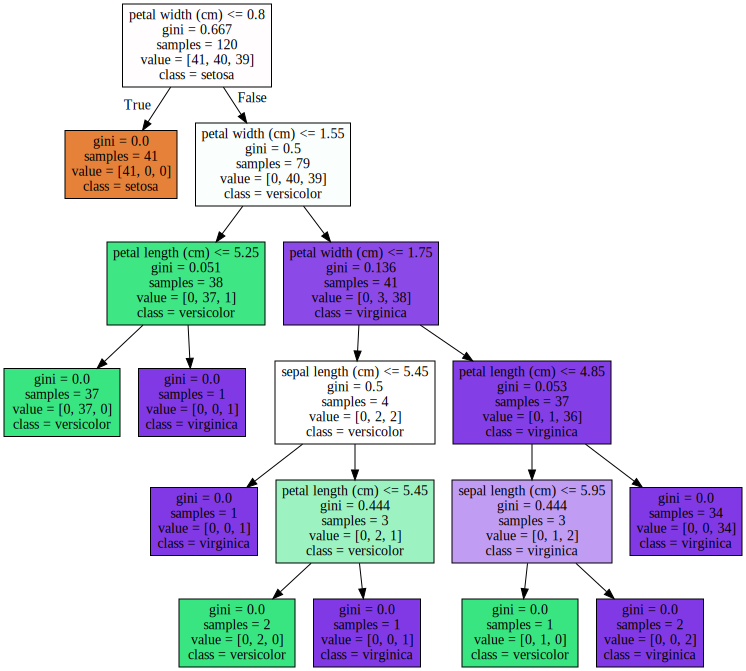

In [125]:
# fit() 으로 학습 수행시 생성된 tree를 스크립트 텍스트로 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(df_clf,out_file = 'tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names,impurity=True,filled=True)

# tree 스크립트 파일을 불러와서 그래프로 출력
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [155]:
# 과제

df = pd.read_csv('balance-scale.csv')

# x값, 피쳐만 추출
balance_data = df
print(balance_data.shape)  (624, 5)

# # ['sepal length (cm)','sepal width (cm)','petal length (cm)']

# # y값, 답(label)만 추출
# iris_label = iris.target
# print(iris_label.shape)    # (150,)
# print(iris.target_names)   # []

# iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
# iris_df['label'] = iris_label
# print(iris_df['label'].value_counts())   # 50,50,50 [150개]
# iris_df

(624, 5)


TypeError: 'NoneType' object is not callable

In [149]:
df

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4
